In [1]:
#Group 7 BrenningmeyerHerkenrathMishra

In [2]:
import numpy as np
from scipy import integrate
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [3]:
def Euler(s, k, x_0, tau, tFinal):
    # initialize lists
    states = []
    t = 0.0
    x = x_0
    R = ReactionRates(k,x) 
    timepoints = np.arange(0,tFinal,tau)
    #states.append(x[1])
    

    for time in timepoints:
        states.append(x[1])
        R = ReactionRates(k,x)  
        x += np.dot(s,R) *  tau
        
        

    return timepoints, states

In [4]:
def ODESolver(s, k, x_0, tau, tFinal):
    # initialize lists
    t = 0.0
    x = x_0
    timepoints = np.arange(0,tFinal,tau)
    sol = solve_ivp(RHS,[t,tFinal],x, methode='RK45',t_eval=timepoints)
    return sol.t, sol.y[1]

In [5]:
def ReactionRates(k,X):
        R = np.zeros((4,1))
        R[0] = k[0]*X[0]
        R[1] = k[1]*X[0]*X[1]
        R[2] = k[2]*X[0]*X[1]
        R[3] = k[3]*X[1]
        return R[:,0]

In [6]:
def RHS(t,y):
    dx= np.dot(s,ReactionRates(k,y))
    return dx

In [7]:
inputFile = np.loadtxt('Input1.txt')

# Stoichiometric matrix
global s
s = np.array([[1,-1,-1,0],[0,0,1,-1]])

# Reaction parameters
lamda = 0.3
k1 = 0.01
k2 = 0.01
delta2 = 0.3

global k
k = [lamda, k1, k2, delta2]


In [8]:
# Initial state
x_0 =[int(inputFile[0]), int(inputFile[1])]
tau = [0.01,0.02,0.05,0.1]
tFinal = 100
t_0 = 0

C:\Users\Jule Brenningmeyer\anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `methode`.
  warn("The following arguments have no effect for a chosen solver: {}."


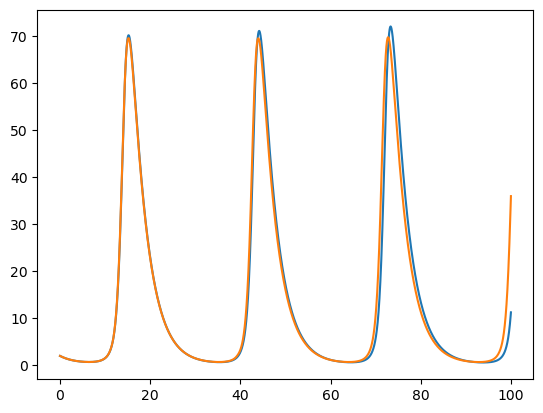

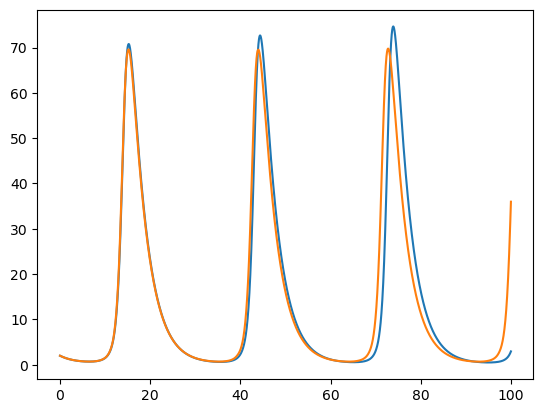

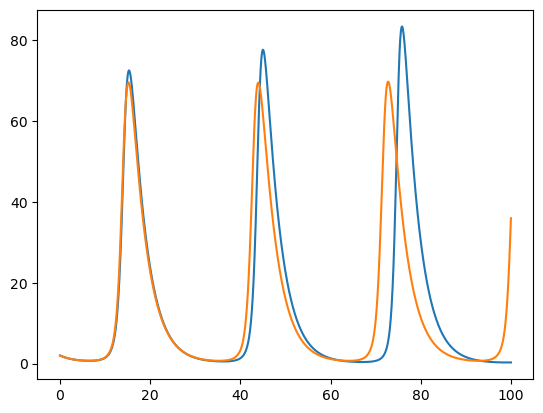

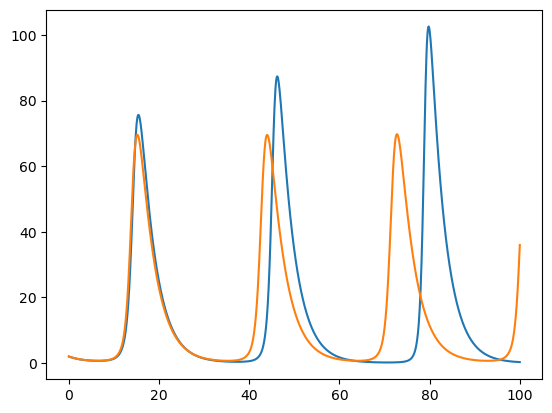

In [9]:
error =[]
for i in range(len(tau)):
    timepoints = np.arange(0,tFinal+tau[i],tau[i])
    Euler_t, Euler_s = Euler(s, k, x_0, tau[i], tFinal+tau[i])
    ODE_t, ODE_s = ODESolver(s, k, x_0, tau[i], tFinal+tau[i])
    
    plt.figure()
    plt.plot(Euler_t,Euler_s)
    plt.plot(ODE_t,ODE_s)
    plt.show()
    
    error.append(1/len(timepoints)*sum(np.abs(Euler_s-ODE_s)))

In [10]:
output = np.concatenate((np.array(tau,ndmin=2),np.array(error,ndmin=2)), axis=0)

np.savetxt('Error1bTraj.txt',output,delimiter = ',',fmt='%1.3f')

In [11]:
# bigger steps results in more errors